In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
resources = ['punkt', 'wordnet','stopwords','averaged_perceptron_tagger']
nltk.download(resources)
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/cor

In [2]:
df = pd.read_csv('/kaggle/input/twitter-sentiment-dataset/Twitter_Data.csv')
df = df[0:2000]
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
df.shape

(2000, 2)

In [4]:
df.isnull().sum()

clean_text    1
category      0
dtype: int64

In [5]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,clean_text,category
148,NaN,0.0


In [6]:
df = df.dropna()
df.shape


(1999, 2)

In [7]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='category', ylabel='Count'>

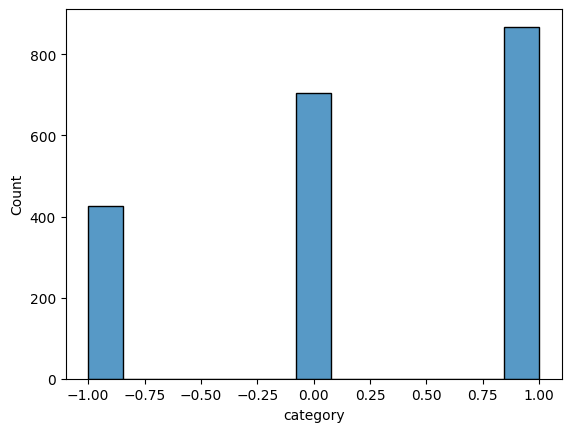

In [8]:
X = df.clean_text
y = df.category

sns.histplot(y)

In [9]:
# To clean the text of non alphabets

X = X.str.replace(r'[^a-zA-Z\s]', '', regex=True)
X

0       when modi promised minimum government maximum ...
1       talk all the nonsense and continue all the dra...
2       what did just say vote for modi  welcome bjp t...
3       asking his supporters prefix chowkidar their n...
4       answer who among these the most powerful world...
                              ...                        
1995    eam have decided not criticise bullshits befor...
1996    modi meetings andhra pradesh march april modi ...
1997    one vote can make all the difference anil kapo...
1998         yes want see this movie great narendra modi 
1999    documents reveal modi and javadekars war india...
Name: clean_text, Length: 1999, dtype: object

In [10]:
# removing numbers and special characters
df['cleaned_text'] = df['clean_text'].str.replace('[^a-zA-Z\s]','',regex=True)

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    fil_words = [word for word in words if word not in stop_words]
    new_sentence = ' '.join(fil_words)
    return new_sentence

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


In [11]:
# Tokenization

from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df.head()


,clean_text,category,cleaned_text,tokens
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,"[answer, among, powerful, world, leader, today..."


In [12]:
df.drop(['cleaned_text' ],axis = 1, inplace=True)
df.head()

,clean_text,category,tokens
0,when modi promised “minimum government maximum...,-1.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today..."


In [13]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J']: wn.ADJ
tag_map['V']: wn.VERB
tag_map['R']: wn.ADV

In [14]:
def lemmatize_token_list(token_list):

    # creating tagged tokens
    tagged_tokens = pos_tag(token_list)
    final_words = []

    # lemmatization
    for i in range(len(token_list)):
        token , tag = tagged_tokens[i]
        word_final = lemmatizer.lemmatize(token, tag_map[tag[0]])
        final_words.append(word_final)

    return final_words

# applying text preprocessing to tokens column

df['lemma'] = df['tokens'].apply(lemmatize_token_list)
df.head()

,clean_text,category,tokens,lemma
0,when modi promised “minimum government maximum...,-1.0,"[modi, promised, minimum, government, maximum,...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,...","[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today...","[answer, among, powerful, world, leader, today..."


In [15]:
y = df['category']
y

0      -1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1995    0.0
1996    0.0
1997    1.0
1998    1.0
1999    1.0
Name: category, Length: 1999, dtype: float64

In [16]:
X = df.lemma

def join_func(X):
    text = X
    next_text = ' '.join(text)
    return next_text

X = X.apply(join_func)
X

0       modi promised minimum government maximum gover...
1                  talk nonsense continue drama vote modi
2       say vote modi welcome bjp told rahul main camp...
3       asking supporter prefix chowkidar name modi gr...
4       answer among powerful world leader today trump...
                              ...                        
1995           eam decided criticise bullshit rd may else
1996    modi meeting andhra pradesh march april modi m...
1997    one vote make difference anil kapoor answer mo...
1998               yes want see movie great narendra modi
1999    document reveal modi javadekars war india envi...
Name: lemma, Length: 1999, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_X, test_X, train_y , test_y = train_test_split(X, y, test_size = 0.2)

In [18]:
tfidf_func = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_func.fit_transform(train_X)
X_test_tfidf = tfidf_func.transform(test_X)
X_test_tfidf.shape

(400, 1000)

In [19]:
SVM = svm.SVC(C=1.0 , kernel='linear', degree=3 , gamma='auto')
SVM.fit(X_train_tfidf,train_y)

preds = SVM.predict(X_test_tfidf)
preds

array([ 0.,  1.,  1., -1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  0.,  0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  0., -1.,  0., -1.,  1.,  0.,
       -1.,  1.,  1.,  1., -1.,  0., -1., -1., -1., -1.,  1.,  0.,  0.,
        0.,  1., -1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0., -1.,  1.,  0.,  1.,  1.,  0., -1.,  1.,  0.,  1.,  0.,
        1., -1.,  1.,  0.,  1., -1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0., -1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0., -1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1., -1., -1.,
        1.,  1.,  0.,  1., -1.,  0., -1.,  1.,  1.,  1.,  0., -1

In [20]:
print("SVM Accuracy Score -> ",accuracy_score(preds, test_y)*100)

SVM Accuracy Score ->  66.25
